<a href="https://colab.research.google.com/github/luqmanrofifm/Image-Classifier-Hand-action-Rock-Paper-Scissor-/blob/main/Image_Classifier_Rock%2C_Paper%2C_Scissor_(hand_action).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Image Classifcation


Pertama mengakses google drive, karena dataset yang akan digunakan sudah diupload dan berada di google drive yang berupa zip file

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Extract file

---
Dari dataset yang diberikan, sebelum diupload ke google drive, dataset tersebut sudah diproses sehingga dalam dataset tersebut hanya terdapat 3 folder class yang akan ditraining.


In [ ]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/Dicoding/rockpaperscissors_dataset.zip"

Archive:  /content/gdrive/My Drive/Colab Notebooks/Dicoding/rockpaperscissors_dataset.zip
   creating: rockpaperscissors_dataset/
   creating: rockpaperscissors_dataset/paper/
  inflating: rockpaperscissors_dataset/paper/04l5I8TqdzF9WDMJ.png  
  inflating: rockpaperscissors_dataset/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: rockpaperscissors_dataset/paper/0cb6cVL8pkfi4wF6.png  
  inflating: rockpaperscissors_dataset/paper/0eqArS2GgsBeqgSn.png  
  inflating: rockpaperscissors_dataset/paper/0Og76sl5CJhbxWWx.png  
  inflating: rockpaperscissors_dataset/paper/0RA9rcrv8iVvuDDU.png  
  inflating: rockpaperscissors_dataset/paper/0t08v9bAaA0mXGCQ.png  
  inflating: rockpaperscissors_dataset/paper/0Uomd0HvOB33m47I.png  
  inflating: rockpaperscissors_dataset/paper/0vugygEjxQJPr9yz.png  
  inflating: rockpaperscissors_dataset/paper/0zKU6wEhT2cDe9j0.png  
  inflating: rockpaperscissors_dataset/paper/14K62H4KG1hg5qiJ.png  
  inflating: rockpaperscissors_dataset/paper/1Dfw5FRlS4h60JPX.png  
  inflat

Membagi dataset yang ada menjadi data training dan data validasi dengan komposisi 60% training dan 40% validasi

In [ ]:
!pip install split_folders
import split_folders

split_folders.ratio('rockpaperscissors_dataset', output="dataset", seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3412.16 files/s]


Deklarasi variabel  yang berisi path data train dan data validasi

In [ ]:
train = '/content/dataset/train'
val = '/content/dataset/val'

Melakukan augmentasi pada gambar menggunakan library ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train, 
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')
 
validation_generator = val_datagen.flow_from_directory(
        val,
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Menampilkan data train yang akan ditraining

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

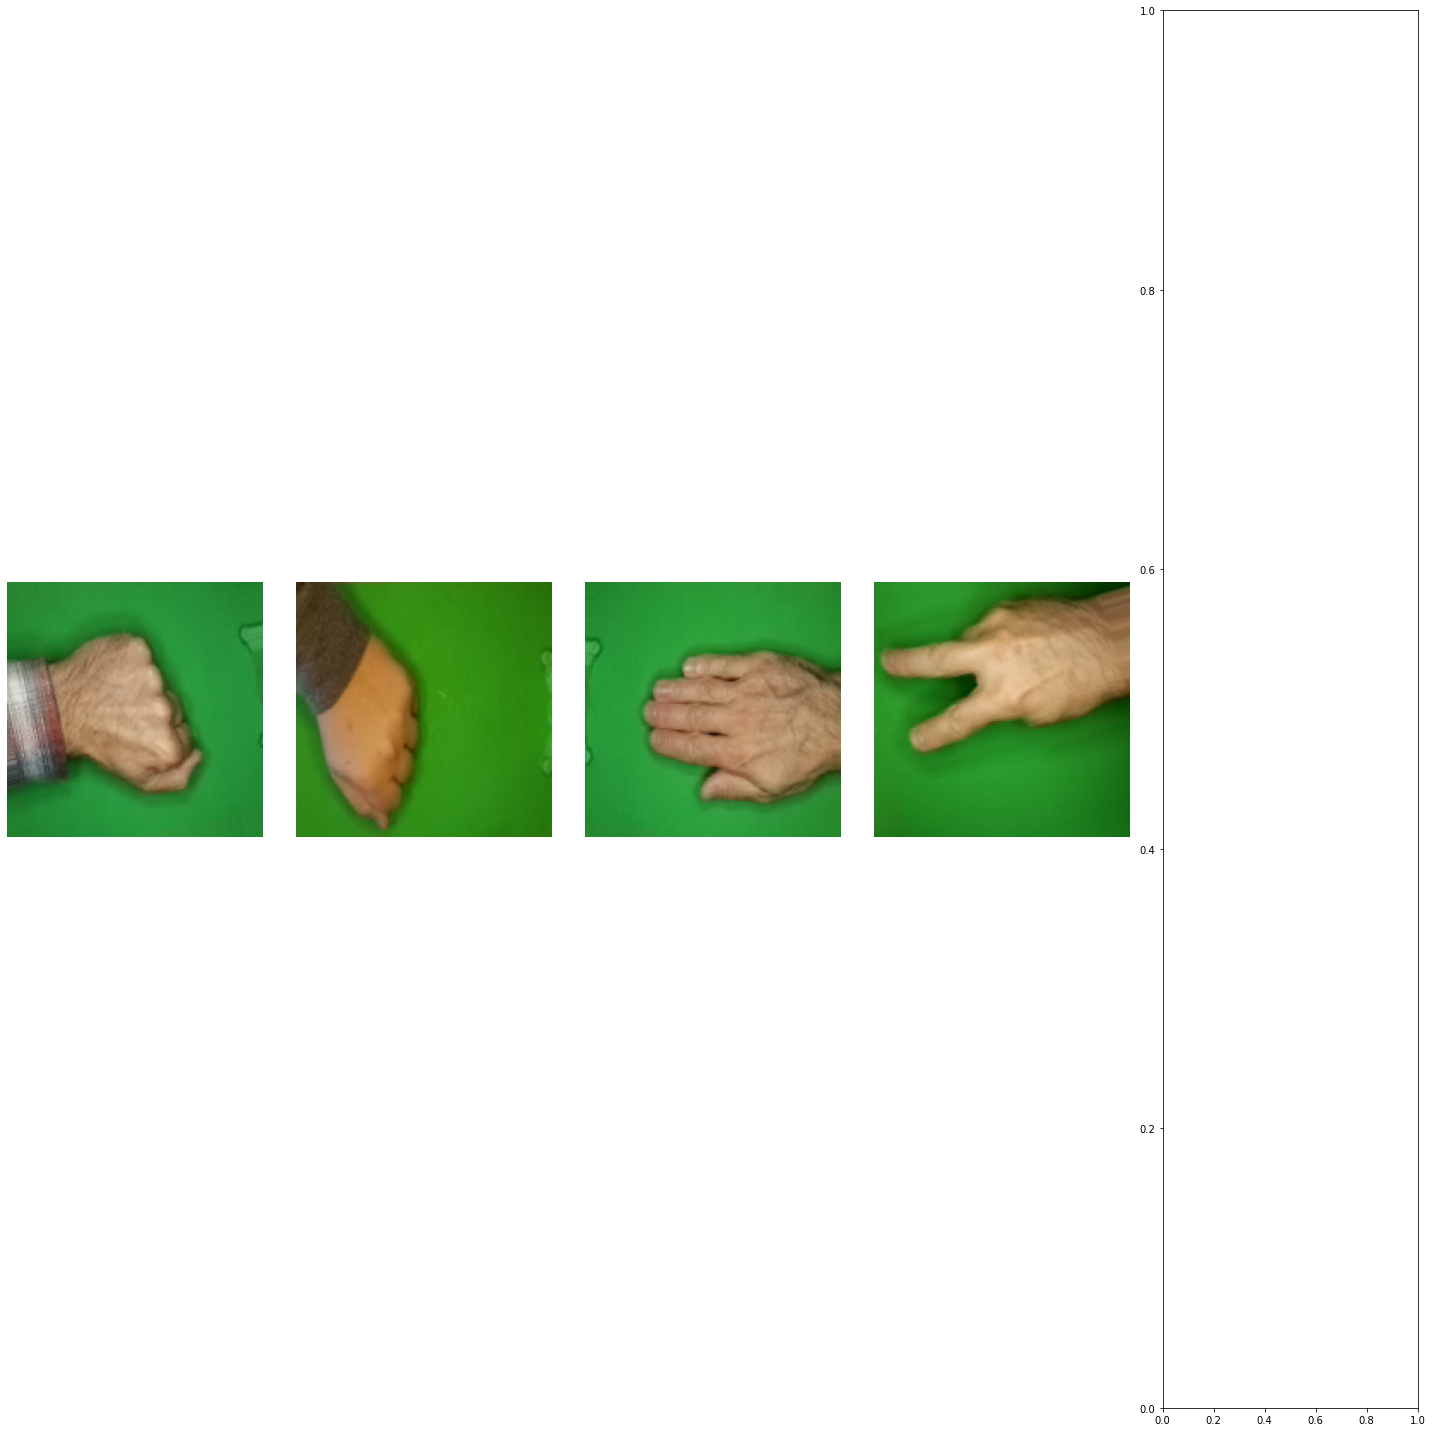

In [ ]:
import matplotlib.pyplot as plt

sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])


PROSES TRAINING

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch=25,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=5, 
          verbose=2)

Epoch 1/30
25/25 - 8s - loss: 1.2442 - accuracy: 0.3600 - val_loss: 1.1074 - val_accuracy: 0.1500
Epoch 2/30
25/25 - 8s - loss: 1.0979 - accuracy: 0.4400 - val_loss: 1.1052 - val_accuracy: 0.2500
Epoch 3/30
25/25 - 8s - loss: 1.0941 - accuracy: 0.4100 - val_loss: 1.0945 - val_accuracy: 0.3500
Epoch 4/30
25/25 - 8s - loss: 1.1038 - accuracy: 0.2900 - val_loss: 1.0952 - val_accuracy: 0.4000
Epoch 5/30
25/25 - 8s - loss: 1.0944 - accuracy: 0.3700 - val_loss: 1.1099 - val_accuracy: 0.1500
Epoch 6/30
25/25 - 8s - loss: 1.0893 - accuracy: 0.4600 - val_loss: 1.0608 - val_accuracy: 0.4500
Epoch 7/30
25/25 - 8s - loss: 1.0641 - accuracy: 0.4000 - val_loss: 0.9815 - val_accuracy: 0.7500
Epoch 8/30
25/25 - 8s - loss: 0.9854 - accuracy: 0.5300 - val_loss: 0.9731 - val_accuracy: 0.7000
Epoch 9/30
25/25 - 8s - loss: 0.7241 - accuracy: 0.7100 - val_loss: 0.8600 - val_accuracy: 0.6500
Epoch 10/30
25/25 - 8s - loss: 0.6012 - accuracy: 0.7700 - val_loss: 0.7767 - val_accuracy: 0.7000
Epoch 11/30
25/25 -

Menampilkan hasil akurasi dari training dan validasi, dan juga loss dari training dan validasi dalam bentuk grafik

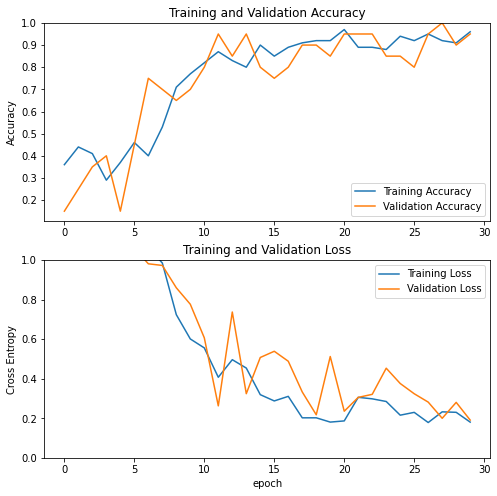

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Using TensorFlow backend.


Saving IMG_20200720_125931.jpg to IMG_20200720_125931.jpg
Saving IMG_20200720_125942.jpg to IMG_20200720_125942.jpg
Saving IMG_20200720_125948.jpg to IMG_20200720_125948.jpg
IMG_20200720_125931.jpg
paper
IMG_20200720_125942.jpg
paper
IMG_20200720_125948.jpg
paper


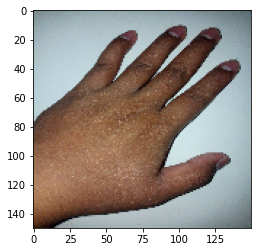

In [ ]:


import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  answer = np.argmax(classes)
  print(fn)
  if answer == 0:
    print('paper')
  elif answer == 1:
    print('rock')
  else:
    print('scissors')
